In [1]:
import sys
IN_COLAB = 'google.colab' in sys.modules
sys.path.append("Codigos")

if IN_COLAB:
    from google.colab import drive
    drive.mount("/content/gdrive/")
    %cd "/content/gdrive/My Drive/Colab Notebooks/bikes-theft-model"
else:
    %cd "../"

# Libraries: Standard ones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

# Library for boxplots
import seaborn as sns
import pandas as pd

#GRAPHS CLASS
from Codigos.DataStatistics import GraphsStatistics as gp

/mnt/d/Nextcloud/2nd semestre/A journey DS/bikes-theft-model


# **Introduction**

## Bicycle use in the world

* There are already more than two billion bikes in use around the world.By 2050, that number could reach five billion
* More than 50% of the human population can ride a bicycle
* For many years, the world has produced more than 100 million bicycles per year. In comparison, the production of cars is about 60 million units per year.
* With the increase in bicycle sales and the increase in bicycle use, we have seen another increase .**An increase in bicycle theft** (Ref [[1]](https://www.weforum.org/agenda/2015/02/why-we-need-to-encourage-cycling-everywhere/#:~:text=This%20makes%20sense%3B%20cycling%20is,way%20of%20getting%20around%20cities.&text=The%20bicycling%20industry%20not%20only,well%20as%20improve%20riders'%20health.)  [[2]](https://www.bikeradar.com/advice/fitness-and-training/30-great-benefits-of-cycling/)  [[3]](https://dailyhive.com/toronto/toronto-bike-thefts-statistics) )

## Commercial applications

There are many applications available on the market for bike users that allow you to connect and share your activity, search for new routes, personal training program, help finding a parking lot, among other features. Like: 

* Strava
* Zwift
* Map My Ride GPS Cycling \& Route Tracker
* Google Maps
* Cyclemeter GPS

But none of them focus on user security. (Ref  [[4]](https://www.quadlockcase.com/blogs/news/the-5-bes%t-cycling-apps) )

## **Context and problematic**

<img src="canada.png">

* Currently, there are numerous campaigns to prevent bicycle theft in the cities of Toronto and Ottawa, so that users are more cautious when securing their bicycles in public places, a problem that **should be covered by public entities**, which ensure the safety of the bicycle user.
* For the year 2018, 3937 and 3727 bicycles were reported as stolen for the cities of Toronto and Ottawa.
* In North America, it is estimated **that only 20% of stolen bicycles are reported to the police**. Only 1% of reported thefts are recovered.
* Reported records of stolen bicycles in Canada City are scarce, making it difficult to study the causes of this problem.
* If we had a solid database, in addition to analyzing the causes of bicycle thefts, **we could predict the percentage of the density of thefts per area**, in order to directly attack the problem for an estimate in the future.

**Note:** For more infomation, please see the references (Ref [[5]](https://dailyhive.com/toronto/toronto-bike-thefts-statistics), [[6]](http://membership.ohiorivertrail.org/index.php/bike-theft-prevention), [[7]](https://vancouver.ca/police/crime-prevention/log-it-or-lose-it.html), [[8]](https://vancouver.ca/police/contact/report-a-crime.html)] and [[9]](https://www.torontopolice.on.ca/core/theft_under.php))

# **General objective**

To analyze the technological, geographical and operational conditions for the application of a data analysis model in order to **determine variables** that affect the rate of bicycle theft in the cities of **Ottawa and Toronto**

## **Specific Objectives**



*   Determine the main factors that contribute to theft, in order to prevent it and increase the **recovery rate** of the bikes.
*  Develop a model that **clarifies risk factors** and, using data science techniques, determines common factors to **predict the probability of theft** in the cities studied.

* Use a predictive model to **fill data gaps** found in the databases on bicycle thefts of the study cities.

* Generate a **heat map** with relevant information by zone.



# **Data sets description**

## **Thefts data sets**

Two data sets are available with information on cycle robberies in two Canadian cities: Ottawa and Toronto. Each record mainly has the location and date of the event. The main aspects of each database are described below.

### **Toronto data set**

This dataset contains Bicycle Thefts occurrences from **2014-2019** . The location of crime occurrences have been deliberately offset to the nearest road intersection node to protect the privacy of parties involved in the occurrence. All location data must be considered as an approximate location of the occurrence and users are advised not to interpret any of these locations as related to a specific address or individual, it has a total of 26 features. The data set can be found [here](https://https://data.torontopolice.on.ca/datasets/698717de582845458159a73ad4a2a8e0_0?geometry=-80.680%2C43.538%2C-78.066%2C43.885)

<table style="undefined;table-layout: fixed; width: 726px">
<colgroup>
<col style="width: 154px">
<col style="width: 375px">
<col style="width: 110px">
<col style="width: 87px">
</colgroup>
<thead>
  <tr>
    <th>Field</th>
    <th>Field Description</th>
    <th>Variable Type</th>
    <th>Num of Unique values</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>X</td>
    <td>Location in cartetian coordinates (X)</td>
    <td>float</td>
    <td>4885</td>
  </tr>
  <tr>
    <td>Y</td>
    <td>Location in cartetian coordinates (Y)</td>
    <td>float</td>
    <td>4874</td>
  </tr>
  <tr>
    <td>FID</td>
    <td>ID </td>
    <td>int</td>
    <td>21584</td>
  </tr>
  <tr>
    <td>Index</td>
    <td>Record Unique Identifier</td>
    <td>int</td>
    <td>21584</td>
  </tr>
  <tr>
    <td>event_unique_id</td>
    <td>Event Occurrence Identifier</td>
    <td>String</td>
    <td>19350</td>
  </tr>
  <tr>
    <td>Primary_Offence</td>
    <td>Offence related to the occurrence</td>
    <td>String</td>
    <td>65</td>
  </tr>
  <tr>
    <td>Occurrence_Date</td>
    <td>Date of occurrence</td>
    <td>String</td>
    <td>2104</td>
  </tr>
  <tr>
    <td>Occurrence_Year</td>
    <td>Occurrence year</td>
    <td>int</td>
    <td>6</td>
  </tr>
  <tr>
    <td>Occurrence_Month</td>
    <td>Occurrence Month</td>
    <td>int</td>
    <td>12</td>
  </tr>
  <tr>
    <td>Occurrence_Day</td>
    <td>Occurrence Day</td>
    <td>int</td>
    <td>31</td>
  </tr>
  <tr>
    <td>Occurrence_Time</td>
    <td>Occurrence Time</td>
    <td>String</td>
    <td>933</td>
  </tr>
  <tr>
    <td>Division</td>
    <td>Police Division where event occurred</td>
    <td>int</td>
    <td>18</td>
  </tr>
  <tr>
    <td>City</td>
    <td>City where event occurred</td>
    <td>String</td>
    <td>1</td>
  </tr>
  <tr>
    <td>Location_Type</td>
    <td>Location Type where event occurred</td>
    <td>String</td>
    <td>44</td>
  </tr>
  <tr>
    <td>Premise_Type</td>
    <td>Premise Type where event occurred</td>
    <td>String</td>
    <td>5</td>
  </tr>
  <tr>
    <td>Bike_Make</td>
    <td>Bicycle Make</td>
    <td>String</td>
    <td>725</td>
  </tr>
  <tr>
    <td>Bike_Model</td>
    <td>Bicycle Model</td>
    <td>String</td>
    <td>7008</td>
  </tr>
  <tr>
    <td>Bike_Type</td>
    <td>Bicycle Type</td>
    <td>String</td>
    <td>13</td>
  </tr>
  <tr>
    <td>Bike_Speed</td>
    <td>Bicycle Speed</td>
    <td>int</td>
    <td>62</td>
  </tr>
  <tr>
    <td>Bike_Colour</td>
    <td>Bicycle Colour</td>
    <td>String</td>
    <td>233</td>
  </tr>
  <tr>
    <td>Cost_of_Bike</td>
    <td>Cost of Bicycle</td>
    <td>float</td>
    <td>1458</td>
  </tr>
  <tr>
    <td>Status</td>
    <td>Status of event</td>
    <td>String</td>
    <td>3</td>
  </tr>
  <tr>
    <td>Hood_ID</td>
    <td>Neighbourhood Id</td>
    <td>int</td>
    <td>140</td>
  </tr>
  <tr>
    <td>Neighbourhood</td>
    <td>Neighbourhood name</td>
    <td>String</td>
    <td>140</td>
  </tr>
  <tr>
    <td>Lat</td>
    <td>Longitude of point extracted after offsetting X and &amp; Coordinates to&nbsp;&nbsp;&nbsp;nearest intersection node</td>
    <td>float</td>
    <td>4874</td>
  </tr>
  <tr>
    <td>Long</td>
    <td>Latitude of point extracted after offsetting X and &amp; Coordinates to&nbsp;&nbsp;&nbsp;nearest intersection node</td>
    <td>float</td>
    <td>4885</td>
  </tr>
</tbody>
</table>

### **Ottawa data set**


This dataset contains Bicycle Thefts occurrences from **2015-2019** . The location of crime occurrences have been deliberately offset to the nearest road intersection node to protect the privacy of parties involved in the occurrence. All location data must be considered as an approximate location of the occurrence and users are advised not to interpret any of these locations as related to a specific address or individual, it has a total of 19 features. The data set can be found [here](https://https://open.ottawa.ca/datasets/3620cc7a3b874557bb288d889a4d56c2_0?geometry=-78.421%2C45.008%2C-73.194%2C45.683)

<table style="undefined;table-layout: fixed; width: 726px">
<colgroup>
<col style="width: 154px">
<col style="width: 375px">
<col style="width: 110px">
<col style="width: 87px">
</colgroup>
<thead>
  <tr>
    <th>Field</th>
    <th>Field Description</th>
    <th>Variable Type</th>
    <th>Num of Unique values</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>X</td>
    <td>Location in cartetian coordinates (X)</td>
    <td>float</td>
    <td>4885</td>
  </tr>
  <tr>
    <td>Y</td>
    <td>Location in cartetian coordinates (Y)</td>
    <td>float</td>
    <td>4874</td>
  </tr>
  <tr>
    <td>FID</td>
    <td>ID </td>
    <td>int</td>
    <td>21584</td>
  </tr>
  <tr>
    <td>Index</td>
    <td>Record Unique Identifier</td>
    <td>int</td>
    <td>21584</td>
  </tr>
  <tr>
    <td>event_unique_id</td>
    <td>Event Occurrence Identifier</td>
    <td>String</td>
    <td>19350</td>
  </tr>
  <tr>
    <td>Primary_Offence</td>
    <td>Offence related to the occurrence</td>
    <td>String</td>
    <td>65</td>
  </tr>
  <tr>
    <td>Occurrence_Date</td>
    <td>Date of occurrence</td>
    <td>String</td>
    <td>2104</td>
  </tr>
  <tr>
    <td>Occurrence_Year</td>
    <td>Occurrence year</td>
    <td>int</td>
    <td>6</td>
  </tr>
  <tr>
    <td>Occurrence_Month</td>
    <td>Occurrence Month</td>
    <td>int</td>
    <td>12</td>
  </tr>
  <tr>
    <td>Occurrence_Day</td>
    <td>Occurrence Day</td>
    <td>int</td>
    <td>31</td>
  </tr>
  <tr>
    <td>Occurrence_Time</td>
    <td>Occurrence Time</td>
    <td>String</td>
    <td>933</td>
  </tr>
  <tr>
    <td>Division</td>
    <td>Police Division where event occurred</td>
    <td>int</td>
    <td>18</td>
  </tr>
  <tr>
    <td>City</td>
    <td>City where event occurred</td>
    <td>String</td>
    <td>1</td>
  </tr>
  <tr>
    <td>Location_Type</td>
    <td>Location Type where event occurred</td>
    <td>String</td>
    <td>44</td>
  </tr>
  <tr>
    <td>Premise_Type</td>
    <td>Premise Type where event occurred</td>
    <td>String</td>
    <td>5</td>
  </tr>
  <tr>
    <td>Bike_Make</td>
    <td>Bicycle Make</td>
    <td>String</td>
    <td>725</td>
  </tr>
  <tr>
    <td>Bike_Model</td>
    <td>Bicycle Model</td>
    <td>String</td>
    <td>7008</td>
  </tr>
  <tr>
    <td>Bike_Type</td>
    <td>Bicycle Type</td>
    <td>String</td>
    <td>13</td>
  </tr>
  <tr>
    <td>Bike_Speed</td>
    <td>Bicycle Speed</td>
    <td>int</td>
    <td>62</td>
  </tr>
  <tr>
    <td>Bike_Colour</td>
    <td>Bicycle Colour</td>
    <td>String</td>
    <td>233</td>
  </tr>
  <tr>
    <td>Cost_of_Bike</td>
    <td>Cost of Bicycle</td>
    <td>float</td>
    <td>1458</td>
  </tr>
  <tr>
    <td>Status</td>
    <td>Status of event</td>
    <td>String</td>
    <td>3</td>
  </tr>
  <tr>
    <td>Hood_ID</td>
    <td>Neighbourhood Id</td>
    <td>int</td>
    <td>140</td>
  </tr>
  <tr>
    <td>Neighbourhood</td>
    <td>Neighbourhood name</td>
    <td>String</td>
    <td>140</td>
  </tr>
  <tr>
    <td>Lat</td>
    <td>Longitude of point extracted after offsetting X and &amp; Coordinates to&nbsp;&nbsp;&nbsp;nearest intersection node</td>
    <td>float</td>
    <td>4874</td>
  </tr>
  <tr>
    <td>Long</td>
    <td>Latitude of point extracted after offsetting X and &amp; Coordinates to&nbsp;&nbsp;&nbsp;nearest intersection node</td>
    <td>float</td>
    <td>4885</td>
  </tr>
</tbody>
</table>

## **Census data set**

These 2016 Census data set provide statistical information about the population, age and sex, type of dwelling, families, households and marital status, language among other features. In general terms, the census information is segmented into different geographical units, such as: Census Metropolitan Areas (CMA), Census Division (CD), Census Branch (CSD), Census Area (CT) and Dissemination Area (DA).  For this study, the CT, which is a small and relatively stable area, will be taken as the geographic unit. Census areas usually have a population of 2,500 to 8,000 people. They are located in large urban centers that should have a central urban population of 50,000 or more. Data was obtained from  [[1]](https://https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/index-eng.cfm) and  [[2]](https://https://censusmapper.ca/) 

The following is a statistical analysis for the **cities of Toronto and Ottawa**


In the next table are shown the set of caracteristics for the population data set:

<table>
<thead>
  <tr>
    <th>Field</th>
    <th>Field description</th>
    <th>Variable Type</th>
    <th>Num of unique values</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>GeoUID</td>
    <td>Region id</td>
    <td>float64</td>
    <td>204</td>
  </tr>
  <tr>
    <td>Type</td>
    <td>Subdivision type (Census Track)</td>
    <td>String</td>
    <td>1</td>
  </tr>
  <tr>
    <td>Region Name</td>
    <td>Subdivision Name</td>
    <td>String</td>
    <td>4</td>
  </tr>
  <tr>
    <td>Area (sq km)</td>
    <td>Area in squer Kilimeters</td>
    <td>float64</td>
    <td>203</td>
  </tr>
  <tr>
    <td>Dwellings</td>
    <td>Number of houses</td>
    <td>int64</td>
    <td>196</td>
  </tr>
  <tr>
    <td>Households</td>
    <td>Number of people who live in the <br>house</td>
    <td>int64</td>
    <td>187</td>
  </tr>
  <tr>
    <td>v_CA16_401: Population, 2016</td>
    <td>Number of people in the region </td>
    <td>int64</td>
    <td>201</td>
  </tr>
  <tr>
    <td>v_CA16_406: Population density per square kilometre</td>
    <td>Population density per square <br>kilometre</td>
    <td>float64</td>
    <td>203</td>
  </tr>
  <tr>
    <td>v_CA16_407: Land area in square kilometres</td>
    <td>Land area in square kilometres</td>
    <td>float64</td>
    <td>167</td>
  </tr>
</tbody>
</table>

In the next table are shown the set of caracteristics for the number of reported bikes data set:

<table>
<thead>
  <tr>
    <th>Field</th>
    <th>Field description</th>
    <th>Variable Type</th>
    <th>Num of unique values</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>GeoUID</td>
    <td>ID of subdivision</td>
    <td>float64</td>
    <td>204</td>
  </tr>
  <tr>
    <td>Type</td>
    <td>Subdivision type <br>(Census Track)</td>
    <td>object</td>
    <td>1</td>
  </tr>
  <tr>
    <td>Region Name</td>
    <td>Region Name</td>
    <td>object</td>
    <td>4</td>
  </tr>
  <tr>
    <td>Area (sq km)</td>
    <td>Region area</td>
    <td>float64</td>
    <td>203</td>
  </tr>
  <tr>
    <td>Population</td>
    <td>Population number</td>
    <td>int64</td>
    <td>201</td>
  </tr>
  <tr>
    <td>Dwellings</td>
    <td>House number</td>
    <td>int64</td>
    <td>196</td>
  </tr>
  <tr>
    <td>Households</td>
    <td>Person number</td>
    <td>int64</td>
    <td>187</td>
  </tr>
  <tr>
    <td>v_CA16_5809: Bicycle</td>
    <td>Number of bycicle reported<br>by women</td>
    <td>object</td>
    <td>24</td>
  </tr>
  <tr>
    <td>v_CA16_5808: Bicycle</td>
    <td>Number of bycicle reported<br>by men</td>
    <td>object</td>
    <td>32</td>
  </tr>
  <tr>
    <td>v_CA16_5807: Bicycle</td>
    <td>Total number of bycicle</td>
    <td>object</td>
    <td>45</td>
  </tr>
</tbody>
</table>

# **Data joint construction**

In order to make a comparison between the thefts carried out between the cities of *Ottawa* and *Toronto*, a new data set is created, which aims to summarize the information of population, number of bicycles reported (by area $Km^{2}$) and number of stolen bicycles data given certain location.

## Union of all data sets information
To carry out the analysis by region in each city, the census track (CT) is taken as a subdivision. First the population and bicycle data sets are imported for each city.

In [ ]:
######Importing data sets ##########
dp_ottawa=pd.read_csv('Data/Population/ontario_population_ottawa.csv',header=0) #population Ottawa per CT
dbikes_ottawa= pd.read_csv('Data/Bikes/ontario_bikes_Ottawa.csv',header=0) #Number of bikes Ottawa per CT
dp_toronto=pd.read_csv('Data/Population/toro_population_toronto.csv',header=0) #population Toronto per CT
dbikes_toronto= pd.read_csv('Data/Bikes/toto_bikes_toronto.csv',header=0) #Number of bikes Toronto per CT

#####To viasualize the general information of data sets #####
#display(dp_ottawa.info())
#dp_ottawa.nunique()
#display(dbikes_ottawa.info())
#dbikes_ottawa.nunique()
####Shape or tables 
print(dp_ottawa.shape)
print(dbikes_ottawa.shape)
print(dp_toronto.shape)
print(dbikes_toronto.shape)

(204, 11)
(204, 10)
(572, 11)
(572, 10)


In the next step is created a joint data set by city, with the information of population and number of bikes

In [ ]:
#####CREATE ONE MIX DATAFRAME FOR ALL DATA PER CITY ###########

Data_Ottawa_pop = dp_ottawa.merge(dbikes_ottawa, how = 'inner', left_on='GeoUID', right_on='GeoUID') #Joint data of population and bikes for ottawa
Data_toronto_pop = dp_toronto.merge(dbikes_toronto, how = 'inner', left_on='GeoUID', right_on='GeoUID') #Joint data of population and bikes for toronto


####Rename of some columns #######
Data_Ottawa_pop=Data_Ottawa_pop.rename(columns={'v_CA16_401: Population, 2016':'PopulationCT','v_CA16_406: Population density per square kilometre':'PopulationDensity',
                                                'v_CA16_407: Land area in square kilometres':'LandArea(skm)','v_CA16_5809: Bicycle':'BicycleF','v_CA16_5808: Bicycle':'BicycleM','v_CA16_5807: Bicycle':'BicycleT'})

Data_toronto_pop=Data_toronto_pop.rename(columns={'v_CA16_401: Population, 2016':'PopulationCT','v_CA16_406: Population density per square kilometre':'PopulationDensity',      
                                               'v_CA16_407: Land area in square kilometres':'LandArea(skm)','v_CA16_5809: Bicycle':'BicycleF','v_CA16_5808: Bicycle':'BicycleM','v_CA16_5807: Bicycle':'BicycleT'})

Data_Ottawa_pop.loc[132,'BicycleT']=0

Data_toronto_pop['BicycleT'] = pd.to_numeric(Data_toronto_pop['BicycleT'])
Data_Ottawa_pop['BicycleT'] = pd.to_numeric(Data_Ottawa_pop['BicycleT'])

# Data_Ottawa_pop.to_csv('Data/Data_Ottawa_pop.csv')
# Data_toronto_pop.to_csv('Data/Data_toronto_pop.csv')
#print('Done')

Different xxx and xxxx CTs are available for the cities of Toronto and Ottawa

In [ ]:
Data_toronto_pop.shape , Data_Ottawa_pop.shape  #Data of population and number of theft by city

((572, 20), (204, 20))


Considering that the bicycle theft databases provide the approximate location of the incident, this parameter is used to unify the databases. The thefts are grouped by CT

In [ ]:
###Theft information by city##
data_ottawa=pd.read_csv('Data/Bicycle_Theft_Ottawa_geo.csv',header=0) #Theft data by CT ottawa
data_toronto= pd.read_csv('Data/Bicycle_Thefts_Toronto_geo.csv',header=0) #Theft data by CT Toronto

Some work is done in order to group the information of population, number of bikes and bike thefts by city

In [ ]:
#Copy for pick the must important columns
Toronto_data=data_toronto[['Index_', 'event_unique_id', 'Primary_Offence',
       'Occurrence_Date', 'Occurrence_Year', 'Occurrence_Month',
       'Occurrence_Day', 'Occurrence_Time', 'Division', 'City',
       'Location_Type', 'Premise_Type', 'Bike_Make', 'Bike_Model', 'Bike_Type',
       'Bike_Speed', 'Bike_Colour', 'Cost_of_Bike', 'Status', 'Hood_ID',
       'Neighbourhood', 'Lat', 'Long', 'id']].copy()

Ottawa_data=data_ottawa[['ID', 'Division', 'Sector', 'Report_Date', 'Incident_Date',
       'Incident_Weekday', 'Location_Type', 'Primary_Offence', 'Neighbourhood',
       'Bicycle_Status', 'Bicycle_Value', 'Bicycle_Make', 'Bicycle_Model',
       'Bicycle_Type', 'Bicycle_Frame', 'Bicycle_Colour', 'Bicycle_Speed', 'x',
       'y','id']].copy()

Toronto_data=Toronto_data.rename(columns={'id':'GeoUID'}) #Final dataframe with theft data Toronto
Ottawa_data=Ottawa_data.rename(columns={'id':'GeoUID'}) #Final dataframe with theft data Ottawa

#####Configuration of OcurrenceDate##########
day_type = pd.api.types.CategoricalDtype(categories=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], ordered=True)


Toronto_data['Occurrence_Date']=pd.to_datetime(Toronto_data['Occurrence_Date']) 
Toronto_data['Week_day']=Toronto_data['Occurrence_Date'].dt.day_name() 
Toronto_data["Week_day"] = Toronto_data["Week_day"].astype(day_type)

Ottawa_data['Incident_Date']=pd.to_datetime(Ottawa_data['Incident_Date']) 
Ottawa_data['Week_day']=Ottawa_data['Incident_Date'].dt.day_name() 
Ottawa_data["Week_day"] = Ottawa_data["Week_day"].astype(day_type)


In [ ]:
Ottawa_data.info() , Toronto_data.info()  #Data of theft by cities, agrouped by CT

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5652 entries, 0 to 5651
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                5652 non-null   int64         
 1   Division          5652 non-null   object        
 2   Sector            5652 non-null   int64         
 3   Report_Date       5652 non-null   object        
 4   Incident_Date     5652 non-null   datetime64[ns]
 5   Incident_Weekday  5652 non-null   int64         
 6   Location_Type     5652 non-null   object        
 7   Primary_Offence   5652 non-null   object        
 8   Neighbourhood     5652 non-null   object        
 9   Bicycle_Status    5652 non-null   object        
 10  Bicycle_Value     5019 non-null   float64       
 11  Bicycle_Make      4890 non-null   object        
 12  Bicycle_Model     3367 non-null   object        
 13  Bicycle_Type      5381 non-null   object        
 14  Bicycle_Frame     5337 n

(None, None)

Finally, there is a single data set by city with all the summary information of population, number of bicycles and bicycles stolen by CT (Land area)

In [ ]:
####### CONCATENATION OF SETS ###############
JointOttawa = pd.merge(Data_Ottawa_pop, Ottawa_data, on='GeoUID', how='right') #JOINT DATA SET OF POPULATION, # BIKES , and THEFTS PER CT
JointToronto = pd.merge(Data_toronto_pop, Toronto_data, on='GeoUID', how='right') # JOINT DATA SET OF POPULATION, # BIKES , and THEFTS PER CT

### KEEP JUS THE MOST IMPORTANT COLUMNS #####
JointToronto.drop(['v_CA16_1: Age Stats', 'Type_y', 'Region Name_y',
       'Area (sq km)_y', 'Population _y', 'Dwellings _y', 'Households _y','Index_', 'event_unique_id','City','Premise_Type','Hood_ID'],axis=1,inplace=True)

JointOttawa.drop(['v_CA16_1: Age Stats', 'Type_y', 'Region Name_y',
       'Area (sq km)_y', 'Population _y', 'Dwellings _y', 'Households _y','ID','Sector','Report_Date','Incident_Weekday','Bicycle_Frame'],axis=1,inplace=True)

In [ ]:
######Change the name of columns for have the same information order of information by city #####
JointOttawa=JointOttawa.rename(columns={'Type_x':'Type', 'Region Name_x':'RegionName', 'Area (sq km)_x':'Area(sqKm)', 'Population _x':'Population',
       'Dwellings _x':'Dwellings', 'Households _x':'Households','Bicycle_Status':'Status','x':'Lat','y':'Long','Bicycle_Value':'Cost_of_Bike','Incident_Date':'Occurrence_Date',
       'Bicycle_Make':'Bike_Make', 'Bicycle_Model':'Bike_Model','Bicycle_Type':'Bike_Type', 'Bicycle_Colour':'Bike_Colour', 'Bicycle_Speed':'Bike_Speed'})

JointToronto=JointToronto.rename(columns={'Type_x':'Type', 'Region Name_x':'RegionName', 'Area (sq km)_x':'Area(sqKm)', 'Population _x':'Population',
       'Dwellings _x':'Dwellings', 'Households _x':'Households'})

###Add some dates columns in Ottawa Data set###
JointOttawa['Occurrence_Year']=JointOttawa['Occurrence_Date'].dt.year
JointOttawa['Occurrence_Month']=JointOttawa['Occurrence_Date'].dt.month
JointOttawa['Occurrence_Day']=JointOttawa['Occurrence_Date'].dt.day
JointOttawa['Occurrence_Time'] = pd.to_datetime(JointOttawa['Occurrence_Date'],format= '%H:%M:%S' ).dt.time

JointToronto['BikeDensity']=JointToronto['BicycleT']/JointToronto['LandArea(skm)'] #Numer of bikes by Km^2 Toronto
JointOttawa['BikeDensity']=JointOttawa['BicycleT']/JointOttawa['LandArea(skm)']  #Numer of bikes by Km^2 Toronto

JointToronto['City']='Toronto'
JointOttawa['City']='Ottawa'

####Reorganice the columns of DataFrames #####
JointToronto.sort_index(axis=1,inplace=True)
JointOttawa.sort_index(axis=1,inplace=True)

# JointOttawa.to_csv('Data/JointOttawa.csv')

In [ ]:
JointToronto.info() , JointOttawa.info() #Joint data of each city

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21584 entries, 0 to 21583
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Area(sqKm)         21568 non-null  float64       
 1   BicycleF           21568 non-null  float64       
 2   BicycleM           21568 non-null  float64       
 3   BicycleT           21568 non-null  float64       
 4   BikeDensity        21568 non-null  float64       
 5   Bike_Colour        19855 non-null  object        
 6   Bike_Make          21584 non-null  object        
 7   Bike_Model         13443 non-null  object        
 8   Bike_Speed         21584 non-null  int64         
 9   Bike_Type          21584 non-null  object        
 10  City               21584 non-null  object        
 11  Cost_of_Bike       20048 non-null  float64       
 12  Division           21584 non-null  int64         
 13  Dwellings          21568 non-null  float64       
 14  GeoUID

(None, None)

Creation of just one data set with all the information for both cities

In [ ]:
CityJoint=pd.concat([JointToronto,JointOttawa],ignore_index=True) #Add the two data sets for both cities
CityJoint[['BicycleF', 'BicycleM', 'BicycleT']] = CityJoint[['BicycleF', 'BicycleM', 'BicycleT']].apply(pd.to_numeric)
#CityJoint.to_csv('Data/CityJoint.csv')

In [ ]:
CityJoint.info()  #All data for cities

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27236 entries, 0 to 27235
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Area(sqKm)         27220 non-null  float64       
 1   BicycleF           27220 non-null  float64       
 2   BicycleM           27220 non-null  float64       
 3   BicycleT           27220 non-null  float64       
 4   BikeDensity        27220 non-null  float64       
 5   Bike_Colour        25117 non-null  object        
 6   Bike_Make          26474 non-null  object        
 7   Bike_Model         16810 non-null  object        
 8   Bike_Speed         27236 non-null  int64         
 9   Bike_Type          26965 non-null  object        
 10  City               27236 non-null  object        
 11  Cost_of_Bike       25067 non-null  float64       
 12  Division           27236 non-null  object        
 13  Dwellings          27220 non-null  float64       
 14  GeoUID

In [ ]:
Data_Ottawa_pop=Data_Ottawa_pop.rename(columns={'Type_x':'Type', 'Region Name_x':'RegionName', 'Area (sq km)_x':'Area(sqKm)', 'Population _x':'Population',
       'Dwellings _x':'Dwellings', 'Households _x':'Households'})

Data_toronto_pop=Data_toronto_pop.rename(columns={'Type_x':'Type', 'Region Name_x':'RegionName', 'Area (sq km)_x':'Area(sqKm)', 'Population _x':'Population',
       'Dwellings _x':'Dwellings', 'Households _x':'Households'})

In [ ]:
Data_TOR=pd.concat([Data_toronto_pop,Data_Ottawa_pop],ignore_index=True)
Data_TOR.drop(['v_CA16_1: Age Stats', 'Type_y', 'Region Name_y',
       'Area (sq km)_y', 'Population _y', 'Dwellings _y', 'Households _y'],axis=1,inplace=True)
#Data_TOR.shape , Data_Ottawa_pop.shape , Data_toronto_pop.shape
Data_TOR.columns
Data_TOR['GeoUID'].nunique()

776

In [ ]:
Data_TOR.info() #Union of information of population and bikes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GeoUID             776 non-null    float64
 1   Type               776 non-null    object 
 2   RegionName         776 non-null    object 
 3   Area(sqKm)         776 non-null    float64
 4   Population         776 non-null    int64  
 5   Dwellings          776 non-null    int64  
 6   Households         776 non-null    int64  
 7   PopulationCT       776 non-null    int64  
 8   PopulationDensity  776 non-null    float64
 9   LandArea(skm)      776 non-null    float64
 10  BicycleF           776 non-null    object 
 11  BicycleM           776 non-null    object 
 12  BicycleT           776 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 78.9+ KB


## Creation of data set by year
It is important to mention that the information of population and bicycles is assumed constant during the years given that the information of the census is obtained every [5 years](https://https://www12.statcan.gc.ca/census-recensement/index-eng.cfm), therefore, in order to consider the annual behavior of the bicycle theft, and given that the thefts are not registered in all the city in the same way in all the years, the CT where the information of theft is not found, it is assumed that there were not bicycle thefts in those places. 

In [ ]:
def drop_x(df):
    # list comprehension of the cols that end with '_y'
    to_drop = [x for x in df if x.endswith('_x')]
    df.drop(to_drop, axis=1, inplace=True)

In [ ]:
def ForDataFrameYear(Data_TOR,CityJoint,n_year):

  CityJoint_y=CityJoint[CityJoint['Occurrence_Year']==n_year]
  CityJoint_y = CityJoint_y.merge(Data_TOR,  how='right', on='GeoUID', suffixes=('_x', ''))
  drop_x(CityJoint_y)
  CityJoint_y["Status"].fillna("Bicycle_No_Theft", inplace = True) 
  CityJoint_y['City'].fillna(CityJoint_y['RegionName'],inplace=True)
  CityJoint_y['City'].replace({'Clarence-Rockland':'Ottawa','Russell':'Ottawa','North Grenville':'Ottawa'},inplace=True)
  return CityJoint_y
#CityJoint_2014['GeoUID'].nunique()

In [ ]:
CityJoint_2014= ForDataFrameYear(Data_TOR,CityJoint,2014)
CityJoint_2015= ForDataFrameYear(Data_TOR,CityJoint,2015)
CityJoint_2016= ForDataFrameYear(Data_TOR,CityJoint,2016)
CityJoint_2017= ForDataFrameYear(Data_TOR,CityJoint,2017)
CityJoint_2018= ForDataFrameYear(Data_TOR,CityJoint,2018)
CityJoint_2019= ForDataFrameYear(Data_TOR,CityJoint,2019)

In [ ]:
# CityJoint_2014.to_csv('Data/CityJoint_2014.csv')
# CityJoint_2015.to_csv('Data/CityJoint_2015.csv')
# CityJoint_2016.to_csv('Data/CityJoint_2016.csv')
# CityJoint_2017.to_csv('Data/CityJoint_2017.csv')
# CityJoint_2018.to_csv('Data/CityJoint_2018.csv')
# CityJoint_2019.to_csv('Data/CityJoint_2019.csv')
# CityJoint.to_csv('Data/CityJoint.csv')
# Data_TOR.to_csv('Data/Data_TOR.csv')

# **Spacial analysis**

Now, let's trying to plot a geojson file and function to join data with map

In [2]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    from google.colab import drive
    drive.mount("/content/gdrive/")
    %cd "/content/gdrive/My Drive/Colab Notebooks/bikes-theft-model"
    !pip install geopandas

import numpy as np
import pandas as pd

import branca, geopandas
import folium # package for making maps, please make sure to use a version older than 1.0.0.
from folium.plugins import TimeSliderChoropleth

import ipywidgets
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/geopandas/_compat.py:88: UserWarning:

The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.



In order to be able to plot the geographical maps of Toronto and Ottawa, the **function of `plotMap` was defined**, which plots the map of the filtered city and a specific time. To facilitate the process, functions were defined to make the reading of the data and the maps (`read_data_map`), as well as a function to **correlate the geopositional information with their respective information (`mapJoinTable`)**. 

In [3]:
''' Important functions '''
# Read data & geomap with respect to city
def read_data_map(data_path, geo_path, city):
    skip_cols = ['City']
    
    # Read data of Toronto an Ottawa cities
    canada_data = pd.read_csv(data_path, index_col = 0)
    canada_data = canada_data[canada_data["City"] == city].drop(columns = skip_cols)
    
    if "%Theft/sqKm" in canada_data.columns:
        canada_data["%Theft/sqKm"] = canada_data["%Theft/sqKm"].replace({np.inf:0}) * 100
    if "%PopulationBike" in canada_data.columns:
        canada_data["%PopulationBike"] = canada_data["%PopulationBike"].replace({np.inf:0}) * 100
    
    # Read maps information
    canada_map = geopandas.read_file(geo_path, driver = "GeoJSON").rename(columns = {"id":"GeoUID"})
    return canada_data, canada_map

# Join geopandas with data with two possibles cases (with column or with points in polygon)
def mapJoinTable(df_point, df_map):
    if "GeoUID" in df_point:
        df_point["GeoUID"] = df_point["GeoUID"].astype(str); df_map["GeoUID"] = df_map["GeoUID"].astype(str)
        df_map["id"] = df_map["GeoUID"] # Save column
        return df_map.join(df_point.set_index("GeoUID"), how = "left", on = "GeoUID")
    try:
        df_point = geopandas.GeoDataFrame(df_point, geometry = geopandas.points_from_xy(df_point.x, df_point.y)).set_crs("EPSG:4326")
    except:
        df_point = geopandas.GeoDataFrame(df_point, geometry = geopandas.points_from_xy(df_point.Long, df_point.Lat)).set_crs("EPSG:4326")
    df_result = geopandas.tools.sjoin(df_point, df_map, how='right') # Keep multipoligon data
    return df_result

# Plot a single map
def plotMap(df_data, df_geomap, value_var = "Cost_of_Bike", caption = "Cost of bike by region", 
            name = 'Canada maps', fields2show = ['Cost_of_Bike'], aliases = ['cost']):
    # Map creation colors
    min_cn, max_cn = df_data[value_var].quantile([0.01,0.99]).apply(round, 2)
    colormap = branca.colormap.LinearColormap(
        colors=['white','yellow','orange','red','darkred'], vmin=min_cn, vmax=max_cn,
        index = df_data[value_var].quantile([0.2,0.4,0.6,0.8])
    )
    colormap.caption = caption
    
    # Join both maps only in one
    df_data_geomap = mapJoinTable(df_data, df_geomap).fillna(0)
    
    # Geo map skeleton
    init_local = [z[0] for z in df_data_geomap.iloc[0]["geometry"].centroid.xy][::-1]
    geomap = folium.Map(location = init_local, zoom_start=10, tiles="OpenStreetMap")

    style_function = lambda x: {
        'fillColor': colormap(x['properties'][value_var]),
        'color': 'black', 'weight':2, 'fillOpacity':0.5
    }

    stategeo = folium.GeoJson(df_data_geomap.to_json(), name=name, style_function = style_function,
        tooltip = folium.GeoJsonTooltip(fields = fields2show, aliases = aliases, localize=True)
    ).add_to(geomap)

    colormap.add_to(geomap)
    return geomap

# Plot differents maps with slider
def foliumSlider(df_data, df_geomap, value_var, index_var, caption = "Cost of bike by region", 
                 name = 'Canada maps', fields2show = ['Cost_of_Bike'], aliases = ['cost']):
    
    # Map creation colors
    min_cn, max_cn = df_data[value_var].quantile([0.01,0.99]).apply(round, 2)
    colormap = branca.colormap.LinearColormap(
        colors=['white','yellow','orange','red','darkred'], vmin=min_cn, vmax=max_cn
    )
    colormap.caption = caption
    
    # Join both maps only in one
    df_data_geomap = mapJoinTable(df_data, df_geomap).fillna(0).sort_values(index_var)
    
    # Get styledata for folium
    styledata = {}
    index_lab = np.sort(df_data[index_var].unique()) # Total of maps to graph
#     temp = list(pd.date_range( "2017-1", "2017-12", freq = "MS").strftime("%Y-%m"))
    
    for beat, value in enumerate(df_geomap.index):
        res_beat = df_data[df_data["GeoUID"] == df_geomap.loc[value,"GeoUID"]]
        # fill missing value by zero
        c_count = res_beat.set_index(index_var)[value_var].reindex(index_lab).fillna(0) 
#         c_count = res_beat.set_index(index_var)[value_var].fillna(0) 
        df_tmp = pd.DataFrame(
            {'color': [colormap(count) for count in c_count], 'opacity':0.5},
            index = index_lab
        )
        styledata[str(beat)] = df_tmp
    
    styledict = {str(beat): data.to_dict(orient='index') for beat, data in styledata.items()}
    
    # Geo map skeleton
    init_local = [z[0] for z in df_geomap.iloc[0]["geometry"].centroid.xy][::-1]
    geomap = folium.Map(location = init_local, zoom_start=10, tiles="OpenStreetMap")
    
    # Plot map and time slider
    g = TimeSliderChoropleth(df_data_geomap.to_json(), styledict = styledict).add_to(geomap)
    folium.GeoJson(df_data_geomap.to_json(), style_function = lambda x: {'color': 'black', 'weight':2, 'fillOpacity':0}, 
        tooltip=folium.GeoJsonTooltip(fields=fields2show, aliases=aliases, localize=True)).add_to(geomap)

    colormap.add_to(geomap)
    return geomap

# Plot animation of every year
def updatePlot(data, col_instant, instant, fun_plot, *args, **kwargs):
    df = data[data[col_instant] == instant] # Data filtered
    fun_plot(df, *args, **kwargs) # Update plot

Let's look at the population of Toronto for the year 2016.

In [11]:
# Read geojson/data and put in pandas dataframe
toronto_data, toronto_map = read_data_map(data_path = "./Data/Stolen_bikes_johan_2016.csv", 
                                        geo_path = "./Data/Maps/toro_population_toronto.geojson", 
                                        city = "Toronto")

plotMap(toronto_data_demo, toronto_map, value_var = "PopulationCT", caption = "Population by region", 
            name = 'Canada maps', fields2show = fields, aliases = fields)

To understand better the use of the functions, let's see a simple example of how to use them. Let's take the city of Toronto as an example. To do this, let's take the city of Toronto as an example and filter it by the hour with the highest records of theft. Finally, let's join the two tables and see what happens.

In [4]:
# Read geojson/data and put in pandas dataframe
toronto_data, toronto_map = read_data_map(data_path = "./Data/Stolen_bikes_johan_2016.csv", 
                                        geo_path = "./Data/Maps/toro_population_toronto.geojson", 
                                        city = "Toronto")

max_hour = toronto_data.groupby("Hour").size().idxmax()
toronto_data_demo = toronto_data[toronto_data["Hour"] == max_hour].copy() # Important data = Demo
toronto_data_geomap = mapJoinTable(toronto_data_demo, toronto_map)

display(toronto_data_geomap.head().append(toronto_data_geomap.tail()), toronto_data_geomap.shape, toronto_data_geomap.columns)
# display(toronto_map.head().append(toronto_map.tail()), toronto_map.shape, toronto_map.columns)

a   t    dw    hh      GeoUID   pop  pop2 rgid   rpid     ruid  \
0    0.73445  CT  1246  1143  5350160.00  3116  3230   35  35535  3520005   
1    0.97486  CT  2130  2051  5350351.01  5497  5284   35  35535  3520005   
2    0.11566  CT  2688  2535  5350102.02  4313  4301   35  35535  3520005   
3    0.20716  CT   728   684  5350028.01  1387   988   35  35535  3520005   
4    0.62823  CT  2629  2515  5350164.00  6258  6331   35  35535  3520005   
567  1.12407  CT  2117  1953  5350270.01  4980  5152   35  35535  3520005   
568  1.10548  CT  2376  2250  5350196.02  5635  5748   35  35535  3520005   
569  0.11899  CT   359   340  5350102.05   861   812   35  35535  3520005   
570  0.29723  CT  5192  4954  5350008.01  7503  2729   35  35535  3520005   
571  0.19221  CT  3761  3519  5350063.06  5171  4737   35  35535  3520005   

     ...  Hour PopulationCT BicycleT  Area(sqKm)  SumThBikes  BikesThDensity  \
0    ...   NaN          NaN      NaN         NaN         NaN             NaN   
1    ...   NaN          NaN      NaN         NaN         NaN             NaN   
2    ...   NaN          NaN      NaN         NaN         NaN             NaN   
3    ...   NaN          NaN      NaN         NaN         NaN             NaN   
4    ...   NaN          NaN      NaN         NaN         NaN             NaN   
567  ...   NaN          NaN      NaN         NaN         NaN             NaN   
568  ...  12.0       5635.0     75.0     1.10548         1.0        0.904584   
569  ...   NaN          NaN      NaN         NaN         NaN             NaN   
570  ...   NaN          NaN      NaN         NaN         NaN             NaN   
571  ...  12.0       5171.0    130.0     0.19221         4.0       20.810572   

     BikesDensity  PopulationDensity  %Theft/sqKm  %PopulationBike  
0             NaN                NaN          NaN              NaN  
1             NaN                NaN          NaN              NaN  
2             NaN                NaN          NaN              NaN  
3             NaN                NaN          NaN              NaN  
4             NaN                NaN          NaN              NaN  
567           NaN                NaN          NaN              NaN  
568     67.843833        5097.333285     1.333333         1.330967  
569           NaN                NaN          NaN              NaN  
570           NaN                NaN          NaN              NaN  
571    676.343583       26902.866656     3.076923         2.514020  

[10 rows x 23 columns]

(572, 23)

Index(['a', 't', 'dw', 'hh', 'GeoUID', 'pop', 'pop2', 'rgid', 'rpid', 'ruid',
       'rguid', 'geometry', 'id', 'Hour', 'PopulationCT', 'BicycleT',
       'Area(sqKm)', 'SumThBikes', 'BikesThDensity', 'BikesDensity',
       'PopulationDensity', '%Theft/sqKm', '%PopulationBike'],
      dtype='object')

We observe the lack of information with the `NaN` values. This information, for these specific hours was not available. For other values, let's plot the heatmap by region, using as an analysis variable the density of the percentage of thefts per hour.

In [5]:
fields = toronto_data_demo.columns.drop(['GeoUID', 'Hour']).to_list()
print("[INFO]: Hour =", max_hour)
plotMap(toronto_data_demo, toronto_map, value_var = "%Theft/sqKm", caption = "%Theft/sqKm of bike by region", 
            name = 'Canada maps', fields2show = fields, aliases = fields)

[INFO]: Hour = 12.0


With the little information available for this specific hour, we can see that **the percentage density of thefts (to a greater extent) occurred outside**. Additionally, the states with **the highest density of robberies are some of the largest, due to the high population that is usually concentrated in regions with high volume density**. 

Let's define now a more general procedure to visualize any region, indicating a specific year and the target city.

In [6]:
# User parameters
year = "2016"
hour = 12
city = "Toronto"

# Process
if city == "Ottawa": geo_path = "./Data/Maps/ontario_populatio_ottawa.geojson"
else: geo_path = "./Data/Maps/toro_population_toronto.geojson"
data_path = "./Data/Stolen_bikes_johan_{}.csv".format(year)
canada_data, canada_map = read_data_map(data_path = data_path, geo_path = geo_path, city = city)
canada_data = canada_data[canada_data["Hour"] == hour].copy()
fields = canada_data.columns.drop(['GeoUID', 'Hour']).to_list()
plotMap(canada_data, canada_map, value_var = "%Theft/sqKm", caption = "%Theft/sqKm of bike by region", 
            name = 'Canada maps', fields2show = fields, aliases = fields)

Finally, to make a more reliable analysis, let's look at the behavior of the two cities through the different times of day of all the years available.

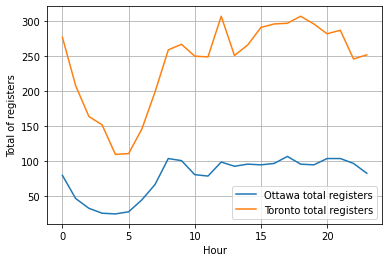

In [7]:
if city == "Ottawa": geo_path = "./Data/Maps/ontario_populatio_ottawa.geojson"
else: geo_path = "./Data/Maps/toro_population_toronto.geojson"
data_path = "./Data/Stolen_bikes_johan_{}.csv".format(year)


# Read data of Toronto an Ottawa cities
path_dict = {"Ottawa": {"data": "./Data/Stolen_bikes_johan_{}.csv", 
                        "geo": "./Data/Maps/ontario_populatio_ottawa.geojson"},
             "Toronto":{"data": "./Data/Stolen_bikes_johan_{}.csv", 
                        "geo": "./Data/Maps/toro_population_toronto.geojson"}
            }

slider_dict_result = {}

for iax, city in enumerate(["Ottawa", "Toronto"]):
    for i, year in enumerate(["2014", "2015", "2016", "2017", "2018", "2019"]):
        data, canada_map = read_data_map(path_dict[city]["data"].format(year), path_dict[city]["geo"], city)
#         data["year"] = year
        if i == 0: canada_data = data.copy()
        else: canada_data = canada_data.append(data) # Join all data in just one table
    
    canada_data = canada_data.groupby(["GeoUID", "Hour"]).agg("mean").reset_index()
#     display(canada_data.head().append(canada_data.tail()), canada_data.shape, canada_data.columns)
    
    slider_dict_result[city] = {}; hours_reg = []
    for h in canada_data["Hour"].sort_values().unique(): # Save each graph by hour
        data = canada_data[canada_data["Hour"] == h].copy()
        fields = data.columns.drop(['GeoUID', 'Hour']).to_list()
        plotmap = plotMap(data, canada_map, value_var = "%Theft/sqKm", caption = "%Theft/sqKm of bike by region", 
            name = 'Canada maps', fields2show = fields, aliases = fields)
        slider_dict_result[city][str(int(h))] = plotmap
        hours_reg.append(len(data))
    
    plt.plot(hours_reg, label = "{} total registers".format(city))

plt.xlabel("Hour"); plt.ylabel("Total of registers")
plt.legend(); plt.grid(); plt.show()

In [8]:
### User parameters
hour = 17
city = "Ottawa"
slider_dict_result[city][str(hour)]    

In [9]:
### User parameters
hour = 17
city = "Toronto"
slider_dict_result[city][str(hour)]    

By the 17th hour, through the years, we see that the city of Ottawa has a higher density of thefts tending again **to the outsites of the city**. With this information, we could start the corresponding investigations to find out the cause of this. Possibly it is easier for bicycle thieves to steal at these extremes, or it may be due to a socio-economic factor.

On the other hand, the density of robberies per area is a little more uniform in the city of Toronto, compared to the city of Ottawa. Despite the lack of information in this city, we can observe **certain patterns of behavior over the years as groups of regions with high rates of theft in the center and north-center of the city**.

By comparing the two cities we can ensure that there is more confidence in the data for the city of Toronto (as we have more information for this city). Additionally, a factor to consider is the maximum density value between the two cities. For the city of Ottawa, we have a percentage of 10% stolen cycles per km$^2$, in contrast to the city of Toronto with a percentage of 20% (double), which indicates that **of each cycle stolen in Ottawa per area, two cycles are stolen in Toronto**. 

# **Statistical analysis and visualization**

In this section we analyze and compare the bicycle thefts in the cities of Toronoto and Ottawa

In general, in terms of surface area in $km^2$, Ottawa is much larger than Toronto, but this does not indicate that it has a larger population. According to data provided by governments, Toronto has a much higher population density than Ottawa. The following table summarizes some of these indicators, however, the percentage of the population that reported having a bicycle per square kilometer is very similar.

In [ ]:
def Create_DensityFrame(_Joint,_pop,LandArea_,Population_,bike):

  #Extraction of just stolen bikes status

  Year_aux=_Joint[_Joint['Status']=='STOLEN'].groupby(['Occurrence_Year','GeoUID']).size().reset_index().rename(columns={0:'Count'}) 
  Aux_Geo_ot = pd.merge(Year_aux,_pop[['GeoUID','PopulationCT']], on='GeoUID', how='left')
  Aux_Geo_2_ot=Aux_Geo_ot.groupby(['Occurrence_Year']).sum().reset_index().rename(columns={'Count':'SumThBikes'}) #Sum total per year

  #####NEW VARIABLES OF DENSITY ANALYSIS #########
  Aux_Geo_2_ot['BicycleT']=bike
  Aux_Geo_2_ot['BikesThDensity']=Aux_Geo_2_ot['SumThBikes']/LandArea_ #Theft bikes density
  Aux_Geo_2_ot['BikesDensity']=bike/ LandArea_#Bikes density
  Aux_Geo_2_ot['PopulationDensity'] = Population_/LandArea_ #Population Density
  Aux_Geo_2_ot['LandArea']=LandArea_
  Aux_Geo_2_ot['%Theft/sqKm'] = (Aux_Geo_2_ot['BikesThDensity']/Aux_Geo_2_ot['BikesDensity'])*100 #Percentage of stoles bikes by sq Km
  Aux_Geo_2_ot['%PopulationBike'] =(Aux_Geo_2_ot['BikesDensity']/Aux_Geo_2_ot['PopulationDensity'])*100 #Percentage of bikes by sq Km
  
  return Aux_Geo_2_ot

In [ ]:

def LineGrahp (Density,x_data,y_data,title):

  #fig = px.line(Density_Ottawa, x='Occurrence_Year', y='BikesDensity')
  fig = px.line(Density, x=x_data, y=y_data, title=title)
  fig.show()


### Anual analysis

The following table presents a summary of the main indicators of interest for the cities of Ottawa and Toronto. It can be seen that given the large number of inhabitants in Toronto, there are approximately 4334 citizens for $Km^2$, while in Ottawa, despite being a large city, there are 272 inhabitants for $Km^2$. As it is expected the density of people with bicycles is higher in the city of Toronto, with approximately 54 for $Km^2$, nevertheless, the percentage of population that has a bicycle for $Km^2$ in both cities is similar. It is 1.16% and 1.25% for Ottawa and Toronto, respectively

In [ ]:
LandArea_Toronto=Data_toronto_pop['LandArea(skm)'].sum() #Asuming Land area constant during years
LandArea_Ottawa=Data_Ottawa_pop['LandArea(skm)'].sum() #Asuming Land area constant during years
Population_Ottawa=Data_Ottawa_pop['PopulationCT'].sum() #Asuming Population constant during years
Population_Toronto=Data_toronto_pop['PopulationCT'].sum() #Asuming Population constant during years
bikes_Toronto=Data_toronto_pop['BicycleT'].sum() #Asuming reported bikes constant during years
bikes_Ottawa=Data_Ottawa_pop['BicycleT'].sum() #Asuming reported bikes constant during years

OttawaD=CityJoint.loc[CityJoint['City']=='Ottawa']
TorontoD=CityJoint.loc[CityJoint['City']=='Toronto']

Density_Ottawa=Create_DensityFrame(OttawaD,Data_Ottawa_pop,LandArea_Ottawa,Population_Ottawa,bikes_Ottawa)
Density_Toronto=Create_DensityFrame(TorontoD,Data_toronto_pop,LandArea_Toronto,Population_Toronto,bikes_Toronto)

The following is a comparison of bicycle theft rates by city on an annual basis. First, some filters are applied to the data in order to obtain these graphs.

In [ ]:
Indexes_Ottawa=Density_Ottawa[['BicycleT','BikesDensity', 'PopulationDensity', 'LandArea', '%PopulationBike']].copy().drop_duplicates().T.rename(columns={0:'Ottawa'}) 
Indexes_Toronto=Density_Toronto[['BicycleT','BikesDensity', 'PopulationDensity', 'LandArea','%PopulationBike']].copy().drop_duplicates().T.rename(columns={0:'Toronto'}) 

pd.concat([Indexes_Ottawa,Indexes_Toronto],axis=1)

Ottawa       Toronto
BicycleT           11520.000000  34330.000000
BikesDensity           3.165453     54.471313
PopulationDensity    272.505351   4334.175870
LandArea            3639.290000    630.240000
%PopulationBike        1.161611      1.256786

Below are the bicycle theft density graphs for each city. In Ottawa, a similar behavior is presented over the years, with an average value of 0.25 bicycles per $Km^2$. In Toronto, an increase is observed between 2014 and 2018, going from 4.6 to 6.11 bicycles stolen for $Km^2$. However, between 2018 and 2019 a slight decrease is observed, reaching a minimum value of 5.65 bicycles stolen for $Km^2$.

In [ ]:
LineGrahp(Density_Ottawa,'Occurrence_Year','BikesThDensity','Bike theft density for Ottawa')
LineGrahp(Density_Toronto,'Occurrence_Year','BikesThDensity','Bike theft density for Toronto')

The following chart shows the comparison of the percentage of stolen bicycles per year for $Km^2$. A stable behavior is observed between both cities during the years 2015 to 2018, and a slight decrease between 2018 and 2019 in both cities. However, the density of the percentage of bicycles stolen in the city of Toronto is generally higher than in the city of Ottawa by approximately 2 pp.

In [ ]:

fig = go.Figure()

fig.add_trace(go.Scatter(x=Density_Toronto['Occurrence_Year'],y=Density_Toronto['%Theft/sqKm'],mode='lines',name='Toronto city'))
fig.add_trace(go.Scatter(x=Density_Ottawa['Occurrence_Year'],y=Density_Ottawa['%Theft/sqKm'],mode='lines',name='Ottawa city'))

# Edit the layout
fig.update_layout(title='Percentage of bicycle theft per square kilometer',
                   xaxis_title='Year',
                   yaxis_title='%Theft/sqKm')
fig.show()

The following graph shows the information for the year 2016, in which both cities have a large number of thefts, it is noted that there is no information of all thefts of bicycles committed in the city, this space is compensated with information from the census assuming that there are zero thefts in this area (CT). It is represented with the status "Bicycle_No_Theft".

In [ ]:
Ottawa=CityJoint_2016[CityJoint_2016['City']=='Ottawa'].groupby(['City','GeoUID','Status']).size().reset_index().rename(columns={0:'Count'})
Toronto=CityJoint_2016[CityJoint_2016['City']=='Toronto'].groupby(['City','GeoUID','Status']).size().reset_index().rename(columns={0:'Count'})

labelsO = Ottawa['Status'].value_counts().index
valuesO = Ottawa['Status'].value_counts().values

labelsT = Toronto['Status'].value_counts().index
valuesT = Toronto['Status'].value_counts().values

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labelsO, values=valuesO, name="Ottawa"),
              1, 1)
fig.add_trace(go.Pie(labels=labelsT, values=valuesT, name="Toronto"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Bicycle theft year 2016",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Ottawa', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Toronto', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

### Monthly analysis

This section seeks to analyze the information by month, in order to determine some behavior in the data, in each city

In [ ]:
### Bike theft by month##
Stolen_bikes_mon = CityJoint[CityJoint['Status']=='STOLEN'].groupby(['City','GeoUID','Neighbourhood','Occurrence_Month','PopulationCT', 'BicycleT', 'LandArea(skm)']).size().reset_index().rename(columns={0:'CountTheft'})
Stolen_bikes_mon.groupby(['City','GeoUID','Neighbourhood','Occurrence_Month']).sum().reset_index()
Stolen_bikes_mon['Bike_Density']=Stolen_bikes_mon['BicycleT']/Stolen_bikes_mon['LandArea(skm)']
Stolen_bikes_mon['BikeTheft_Density']=Stolen_bikes_mon['CountTheft']/Stolen_bikes_mon['LandArea(skm)']
Stolen_bikes_mon['%BikeTheft_Density']=(100*(Stolen_bikes_mon['CountTheft']*Stolen_bikes_mon['LandArea(skm)']))/Stolen_bikes_mon['BicycleT']
Stolen_bikes_mon['%BikeTheft_Density2']=(100*Stolen_bikes_mon['BikeTheft_Density'])/Stolen_bikes_mon['Bike_Density']
Stolen_bikes_mon['%BikeTheft_Density'] = Stolen_bikes_mon['%BikeTheft_Density'].replace(np.inf, 0)
Stolen_bikes_mon['%BikeTheft_Density2'] = Stolen_bikes_mon['%BikeTheft_Density2'].replace(np.inf, 0)
#Stolen_bikes_mon_2014['%_TheftDensity'] = 100*(Stolen_bikes_mon_2014['Count'] *  Stolen_bikes_mon_2014['LandArea(skm)']) / Stolen_bikes_mon_2014['BicycleT']
#Stolen_bikes_mon_2014[(Stolen_bikes_mon_2014['Occurrence_Month']==12)]
Stolen_bikes_mon.describe() 

GeoUID  Occurrence_Month  ...  %BikeTheft_Density  %BikeTheft_Density2
count  5.791000e+03       5791.000000  ...         5791.000000          5791.000000
mean   5.283675e+06          6.989639  ...           13.996405             8.784889
std    1.246321e+05          2.819234  ...           68.830551            25.462631
min    5.050001e+06          1.000000  ...            0.000000             0.000000
25%    5.350010e+06          5.000000  ...            0.584615             1.224490
50%    5.350079e+06          7.000000  ...            2.509091             3.648649
75%    5.350218e+06          9.000000  ...            9.900000            10.000000
max    5.350802e+06         12.000000  ...         1718.666667           790.000000

[8 rows x 10 columns]

It is observed that by month, the place where more thefts occurred was in the Church-Yonge Corridor of the city of Toronto

In [ ]:
Stolen_bikes_mon.describe(include='O') 

City               Neighbourhood
count      5791                        5791
unique        2                         244
top     Toronto  Church-Yonge Corridor (75)
freq       4508                         127

According to the box chart, it can be seen that in general the average theft density in the city of Toronto is higher

In [ ]:
fig = px.box(Stolen_bikes_mon, x="Occurrence_Month",y="BikeTheft_Density",color="City",title='Density of bike theft')
fig.show()

For the percentage of bicycle theft per square kilometer, the average in the city of Ottawa is higher despite having fewer bicycles

In [ ]:
fig = px.box(Stolen_bikes_mon, x="Occurrence_Month",y="%BikeTheft_Density",color="City",title='Percentage of theft bicycle by km^2')
fig.show()

In the histogram of thefts, per month, a normal distribution of the data per city is observed, which gives us an indication to be able to predict new information per month

In [ ]:
Stolen_bikes_mon = CityJoint[CityJoint['Status']=='STOLEN']
fig = px.histogram(Stolen_bikes_mon, x="Occurrence_Month", color="City")
fig.show()

In the histogram of Density thefts, per month, an exponential distribution of the data per city is observed, which gives us an indication to be able to predict new information per month

In [ ]:
Stolen_bikes_mon = CityJoint[CityJoint['Status']=='STOLEN'].groupby(['City','GeoUID','Neighbourhood','Occurrence_Month','PopulationCT', 'BicycleT', 'LandArea(skm)']).size().reset_index().rename(columns={0:'CountTheft'})
Stolen_bikes_mon.groupby(['City','GeoUID','Neighbourhood','Occurrence_Month']).sum().reset_index()
Stolen_bikes_mon['Bike_Density']=Stolen_bikes_mon['BicycleT']/Stolen_bikes_mon['LandArea(skm)']
Stolen_bikes_mon['BikeTheft_Density']=Stolen_bikes_mon['CountTheft']/Stolen_bikes_mon['LandArea(skm)']
Stolen_bikes_mon['%BikeTheft_Density']=(100*(Stolen_bikes_mon['CountTheft']*Stolen_bikes_mon['LandArea(skm)']))/Stolen_bikes_mon['BicycleT']
Stolen_bikes_mon['%BikeTheft_Density2']=(100*Stolen_bikes_mon['BikeTheft_Density'])/Stolen_bikes_mon['Bike_Density']
Stolen_bikes_mon['%BikeTheft_Density'] = Stolen_bikes_mon['%BikeTheft_Density'].replace(np.inf, 0)
Stolen_bikes_mon['%BikeTheft_Density2'] = Stolen_bikes_mon['%BikeTheft_Density2'].replace(np.inf, 0)
#Stolen_bikes_mon_2014['%_TheftDensity'] = 100*(Stolen_bikes_mon_2014['Count'] *  Stolen_bikes_mon_2014['LandArea(skm)']) / Stolen_bikes_mon_2014['BicycleT']
#Stolen_bikes_mon_2014[(Stolen_bikes_mon_2014['Occurrence_Month']==12)]
Stolen_bikes_mon.describe() 
fig = px.histogram(Stolen_bikes_mon, x="BikeTheft_Density", color="City")
fig.show()

### Day Analysis

In [ ]:
Stolen_bikes_day = CityJoint[CityJoint['Status']=='STOLEN'].groupby(['Occurrence_Day','City']).size().reset_index().rename(columns={0:'CountTheft'})
Stolen_bikes_day

Occurrence_Day     City  CountTheft
0                1   Ottawa         187
1                1  Toronto         737
2                2   Ottawa         148
3                2  Toronto         603
4                3   Ottawa         168
..             ...      ...         ...
57              29  Toronto         623
58              30   Ottawa         139
59              30  Toronto         554
60              31   Ottawa          76
61              31  Toronto         280

[62 rows x 3 columns]

In [ ]:
Stolen_bikes_day = CityJoint[CityJoint['Status']=='STOLEN']
fig = px.histogram(Stolen_bikes_day, x="Occurrence_Day", color="City",nbins=50)
fig.show()

In [ ]:
allJoint =pd.read_csv('./Data/CityJoint.csv', header =0, index_col='Unnamed: 0')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.



Analysis by Day and Hour

This section seeks to analyze the information by day and hour, in order to determine some behavior in the data, in each city.

In [ ]:
### Function of Bar Graph

import plotly.express as px
def bargraph(Density,x_data,y_data,colord, title):
  fig = px.bar(Density, x=x_data, y=y_data,color=colord, title=title)
  fig.show()

In [ ]:
allJoint['Occurrence_Time'] = pd.to_datetime(allJoint['Occurrence_Time']) # Time format to the incident column
allJoint['Hour'] = allJoint['Occurrence_Time'].dt.hour # Extract the hour and add to the dataframe

df_yd=allJoint[allJoint['Status']=='STOLEN'].groupby(['City','Occurrence_Month','Occurrence_Day']).size().reset_index().rename(columns={0:'SumThBikes'}) #Aggrupate data by vity month and day

print(df_yd)
LandArea = allJoint['Area(sqKm)']
bikes = allJoint['BicycleT']
Population = allJoint['PopulationCT']

df_yd['BikesThDensity']=df_yd['SumThBikes']/bikes #Theft bikes density
df_yd['BikesDensity']= bikes / LandArea#Bikes density
df_yd['PopulationDensity'] =Population/LandArea#Population Density
df_yd['%Theft/sqKm'] = (df_yd['BikesThDensity']/df_yd['BikesDensity']) #Percentage of stoles bikes by sq Km
df_yd['%PopulationBike'] =(df_yd['BikesDensity']/df_yd['PopulationDensity']) #Percentage of bikes by sq Km
df_yd['SumThBikes'] = df_yd['SumThBikes']

        City  Occurrence_Month  Occurrence_Day  SumThBikes
0     Ottawa                 1               1           1
1     Ottawa                 1               3           1
2     Ottawa                 1               4           1
3     Ottawa                 1               5           1
4     Ottawa                 1               7           1
..       ...               ...             ...         ...
681  Toronto                12              27          26
682  Toronto                12              28          17
683  Toronto                12              29          14
684  Toronto                12              30          18
685  Toronto                12              31          14

[686 rows x 4 columns]


In [ ]:
df_hd=allJoint[allJoint['Status']=='STOLEN'].groupby(['City','Occurrence_Day', 'Hour']).size().reset_index().rename(columns={0:'SumThBikes'}) #Aggrupate data by city, Day and hour

print(df_hd)
LandArea = allJoint['Area(sqKm)']
bikes = allJoint['BicycleT']
Population = allJoint['PopulationCT']

df_hd['BikesThDensity']=df_hd['SumThBikes']/bikes #Theft bikes density
df_hd['BikesDensity']= bikes / LandArea#Bikes density
df_hd['PopulationDensity'] =Population/LandArea#Population Density
df_hd['%Theft/sqKm'] = (df_hd['BikesThDensity']/df_hd['BikesDensity']) #Percentage of stoles bikes by sq Km
df_hd['%PopulationBike'] =(df_hd['BikesDensity']/df_hd['PopulationDensity']) #Percentage of bikes by sq Km
df_hd['SumThBikes'] = df_hd['SumThBikes']

         City  Occurrence_Day  Hour  SumThBikes
0      Ottawa               1     0          12
1      Ottawa               1     1           4
2      Ottawa               1     2           2
3      Ottawa               1     3           1
4      Ottawa               1     4           2
...       ...             ...   ...         ...
1431  Toronto              31    19          22
1432  Toronto              31    20          10
1433  Toronto              31    21          14
1434  Toronto              31    22          14
1435  Toronto              31    23          14

[1436 rows x 4 columns]


In [ ]:


bargraph(df_yd[df_yd['City']== 'Toronto'],'Occurrence_Month','Occurrence_Day','%Theft/sqKm','Bike day theft density for Toronto')
# fig = px.histogram(df_yd, x="Occurrence_Day", color="City")
# fig.show()


Above we can see a bar graph, along with a heat map that represents the grouping of all the months of the year and each of these is represented along with the days that make it up, the metric used is the percentage of theft per square kilometer, for the city of Toronto you can see that the months in which this metric is higher is October, November and December, you can see that for October when the rate of theft is higher is within the 17-29 of the respective month, also you can see that for November is for the 12-20.   



In [ ]:
bargraph(df_yd[df_yd['City']== 'Ottawa'],'Occurrence_Month','Occurrence_Day','%Theft/sqKm','Bike day-month theft density per sqkm for Ottawa')

Above we can see a bar graph as above, the metric used is the percentage of theft per square kilometer, for the city of Ottawa you can see that the months in which this metric is higher is June, July, August and September, you see that for June when the rate of theft is higher is within the day 10-27 of the respective month, also you can see that for July, August and September is maintained a high value throughout the month.



In [ ]:
bargraph(df_hd[df_hd['City']== 'Toronto'],'Occurrence_Day','Hour','%Theft/sqKm','Bike day-hour theft density for Toronto')

In the previous graph you can see a grouping by days of the month, separated by the 24 hours of the day in order to observe at what time of day are presented May thefts using the ratio of thefts per square kilometer (%theft/sqKM), you can see that where there are more thefts is the day 18-30 of the average days of all months, and when the metric is higher during these days is usually during the 15 h - 21h, this is for Toronto.

In [ ]:
bargraph(df_hd[df_hd['City']== 'Ottawa'],'Occurrence_Day','Hour','%Theft/sqKm','Bike day-hour theft density for Ottawa')

This graph represents the same as above using the ratio of thefts per square kilometer (%theft/sqKM), you can see that where there are more thefts is the day 28-30 of the average days of all months, and when the metric is higher during these days is throughout the course of the day, for the city of Ottawa.

In [ ]:
allJoint['BikesDensity']= bikes / LandArea#Bikes density
df_hd=allJoint[allJoint['Status']=='STOLEN'].groupby(['City','Neighbourhood', 'Hour']).size().reset_index().rename(columns={0:'SumThBikes'}) #Aggrupation by City, Location Type and Hour 
#df_hd['BikesDensity']= bikes / LandArea#Bikes density
print(df_hd)

bargraph(df_hd[df_hd['City']== 'Ottawa'],'Neighbourhood','Hour','SumThBikes', 'Bike day-hour location type theft density for Ottawa')

         City            Neighbourhood  Hour  SumThBikes
0      Ottawa      Bayshore - Belltown     6           1
1      Ottawa      Bayshore - Belltown     8           2
2      Ottawa      Bayshore - Belltown    10           3
3      Ottawa      Bayshore - Belltown    11           3
4      Ottawa      Bayshore - Belltown    12           3
...       ...                      ...   ...         ...
3649  Toronto  Yorkdale-Glen Park (31)    19           4
3650  Toronto  Yorkdale-Glen Park (31)    20           2
3651  Toronto  Yorkdale-Glen Park (31)    21           5
3652  Toronto  Yorkdale-Glen Park (31)    22           3
3653  Toronto  Yorkdale-Glen Park (31)    23           1

[3654 rows x 4 columns]


You can see the grouping of neighborhoods with respect to the hours of the day to observe the number of robberies throughout the day, in Ottawa you can see that the neighborhoods where most thefts occur is centretown and sandy_hill from 8h - 21h.

In [ ]:
bargraph(df_hd[df_hd['City']== 'Toronto'],'Neighbourhood','Hour','SumThBikes', 'Bike day-hour location type theft density for Toronto')

You can see the grouping of neighborhoods with respect to the hours of the day to observe the number of robberies throughout the day, in toronto you can see that the neighborhoods where most thefts occur is Bay Street Corrido and Waterfront Communities from 8h - 21h. During most of the day.